Matheus Silva dos Santos - 22052573 <br>
Felipe Fraxe Filho - 22251894

## Atividade Prática 2: Geração de VA e Fila M/M/1

### Parte 1 (Geração de VA)

In [1]:
# Importações necessárias

import random
import numpy as np
import matplotlib.pyplot as plt
import ADBib
import math

#### VA Exponencial X

In [4]:
def generate_exponential_samples(lambd, num_samples):
    """Gera amostras de uma distribuição Exponencial."""
    return [random.expovariate(lambd) for _ in range(num_samples)]

# Parâmetros da VA Exponencial
beta = 1/9  # Média
lambd = 1/beta # Taxa (lambda = 1/beta)

# Gerando amostras da VA Exponencial
num_samples = 10000
samples_X = generate_exponential_samples(lambd, num_samples)

Geramos 10.000 amostras de exemplo de uma Variável Aleatória (VA) Exponencial com média β = 1/9 utilizando o gerador Mersenne Twister do Python, através da função random.expovariate. O histograma das amostras geradas e a curva da função densidade de probabilidade (PDF) teórica da distribuição exponencial são plotados para visualização na célula abaixo.

A distribuição exponencial é frequentemente utilizada para modelar o tempo entre eventos que ocorrem de forma independente e com uma taxa constante. No nosso caso, podemos interpretar a VA Exponencial X como o tempo entre chegadas de clientes em um sistema de fila, onde a taxa média de chegada é de 9 clientes por segundo (λ = 9).


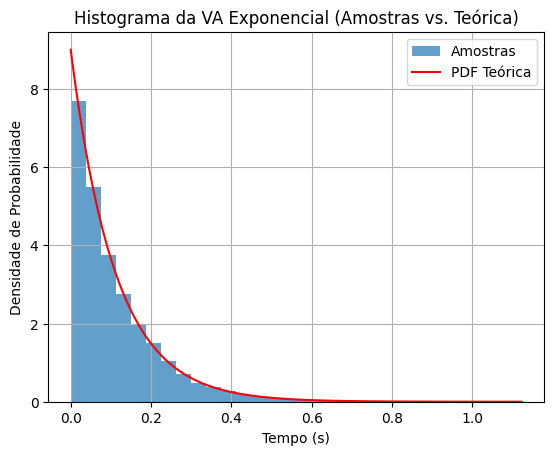

In [5]:
# Plotando o histograma das amostras
plt.hist(samples_X, bins=30, density=True, alpha=0.7, label='Amostras')

# Plotando a função densidade de probabilidade teórica da exponencial
x = np.linspace(0, max(samples_X), 100)
y = lambd * np.exp(-lambd * x)
plt.plot(x, y, 'r-', label='PDF Teórica')

plt.xlabel('Tempo (s)')
plt.ylabel('Densidade de Probabilidade')
plt.title('Histograma da VA Exponencial (Amostras vs. Teórica)')
plt.legend()
plt.grid(True)
plt.show()


**Conclusões**

O histograma da VA Exponencial acima mostra a distribuição de frequências das amostras geradas para o tempo entre chegadas de clientes. O eixo x representa o tempo (em segundos) e o eixo y representa a densidade de probabilidade, que é uma medida de quão provável é observar um determinado valor de tempo entre chegadas.

O histograma tem um formato assimétrico à direita, característico da distribuição exponencial. Isso significa que tempos de chegada curtos são mais prováveis do que tempos de chegada longos.

A curva vermelha representa a função densidade de probabilidade (PDF) teórica da distribuição exponencial. A sobreposição entre o histograma e a curva teórica indica que as amostras geradas seguem de perto a distribuição exponencial esperada.



#### VA Erlang Y

In [6]:
def generate_erlang_samples(lambd, k, num_samples):
    """Gera amostras de uma distribuição Erlang."""
    samples = []
    for _ in range(num_samples):
        sample = sum(random.expovariate(lambd) for _ in range(k))
        samples.append(sample)
    return samples

# Parâmetros da VA Erlang
beta = 1/9  # Média
lambd = 1/beta # Taxa (lambda = 1/beta)
k = 4       # Número de estágios

# Gerando amostras da VA Erlang
num_samples = 10000
samples_Y = generate_erlang_samples(lambd, k, num_samples)

Geramos 10.000 amostras novamente como exemplo de uma VA Erlang com 4 estágios e média β = 1/9. A VA Erlang é a soma de k VAs Exponenciais independentes e identicamente distribuídas.

No nosso caso, podemos interpretar o seguinte:

Cada estágio representa uma fase do serviço em um sistema de fila, e a VA Erlang Y representa o tempo total de serviço de um cliente.

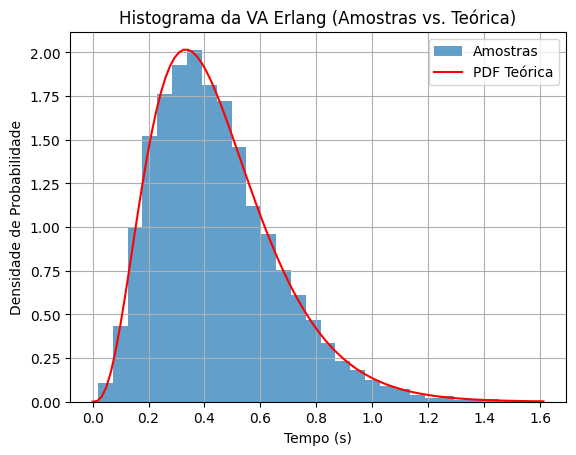

In [7]:
# Plotando o histograma das amostras da VA Erlang
plt.hist(samples_Y, bins=30, density=True, alpha=0.7, label='Amostras')

# Plotando a função densidade de probabilidade teórica da Erlang
x = np.linspace(0, max(samples_Y), 100)
y = (lambd**k * x**(k-1) * np.exp(-lambd * x)) / math.factorial(k-1)
plt.plot(x, y, 'r-', label='PDF Teórica')

plt.xlabel('Tempo (s)')
plt.ylabel('Densidade de Probabilidade')
plt.title('Histograma da VA Erlang (Amostras vs. Teórica)')
plt.legend()
plt.grid(True)
plt.show()

O histograma da VA Erlang acima mostra a distribuição de frequências das amostras geradas para o tempo total de serviço de um cliente. O eixo x representa o tempo (em segundos) e o eixo y representa a densidade de probabilidade.

O histograma da Erlang também é assimétrico à direita, mas com uma cauda mais longa do que o histograma da exponencial. Isso reflete o fato de que o tempo de serviço (soma de 4 tempos exponenciais) tende a ser maior do que o tempo entre chegadas.

A curva vermelha representa a PDF teórica da distribuição Erlang. A sobreposição entre o histograma e a curva teórica indica que as amostras geradas seguem a distribuição Erlang esperada.

#### Função de Distribuição Cumulativa (FDC) de F(x) e F(y)

In [8]:
# --- Função para calcular a FDC a partir de amostras ---
def calculate_cdf(samples):
    hist = ADBib.build_histogram(samples)
    cdf = {}
    cumulative_prob = 0
    for value in sorted(hist.keys()):
        cumulative_prob += hist[value] / len(samples)
        cdf[value] = cumulative_prob
    return cdf

# --- Calculando as FDCs ---
cdf_X = calculate_cdf(samples_X)
cdf_Y = calculate_cdf(samples_Y)

Utilizando as amostras geradas nas células anteriores, calculamos e plotamos as funções cumulativas de distribuição (FDCs) empíricas para as VAs Exponencial e Erlang. A FDC de uma VA em um ponto x representa a probabilidade da VA assumir um valor menor ou igual a x.

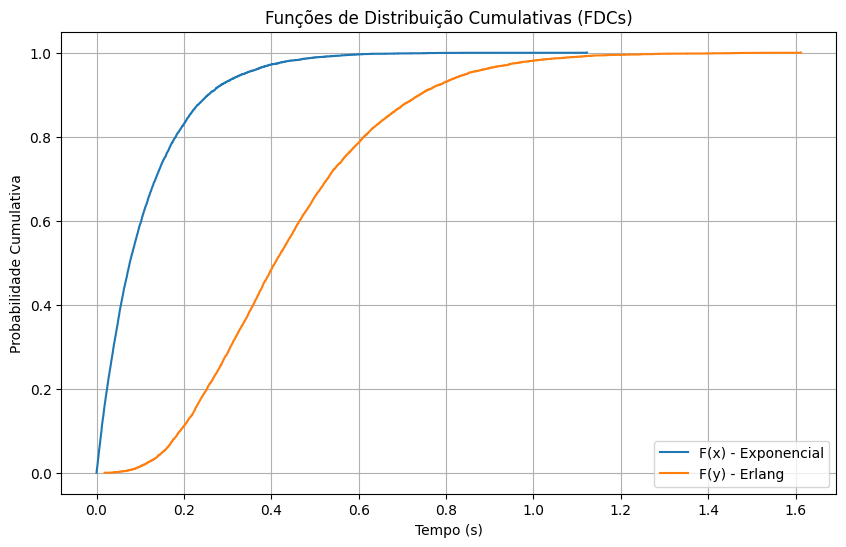

In [9]:
# --- Plotando as FDCs ---
plt.figure(figsize=(10, 6))

# FDC da Exponencial
plt.step(cdf_X.keys(), cdf_X.values(), where='post', label='F(x) - Exponencial')

# FDC da Erlang
plt.step(cdf_Y.keys(), cdf_Y.values(), where='post', label='F(y) - Erlang')

plt.xlabel('Tempo (s)')
plt.ylabel('Probabilidade Cumulativa')
plt.title('Funções de Distribuição Cumulativas (FDCs)')
plt.legend()
plt.grid(True)
plt.show()

O gráfico das FDCs mostra a probabilidade acumulada de cada VA em função do tempo. O eixo x representa o tempo (em segundos) e o eixo y representa a probabilidade cumulativa.

A curva da FDC da exponencial cresce rapidamente no início, indicando que a probabilidade de tempos de chegada curtos é alta. A curva se aproxima de 1 (100%) rapidamente, o que significa que a maioria dos tempos de chegada são relativamente curtos.

A curva da FDC da Erlang cresce mais lentamente do que a da exponencial, refletindo o fato de que o tempo de serviço tende a ser maior. A curva se aproxima de 1 (100%) mais lentamente, indicando que há uma maior dispersão nos tempos de serviço.

A análise conjunta dos histogramas e das FDCs nos permite entender a dinâmica do sistema de fila. Os tempos de chegada (VA Exponencial) são geralmente curtos, enquanto os tempos de serviço (VA Erlang) são mais longos e variáveis.


### Parte 2 (Fila M/M/1)

In [14]:
# Importações necessárias

import numpy as np
import random
import matplotlib.pyplot as plt
import ADBib

#### Implementação de uma fila M/M/1

- taxa de entrada: λ=9 clientes por segundo
- taxa de serviço: μ=10 clientes por segundo.


Para n = 10^3:
Tempo Médio Estimado de Espera: 0.879777
Intervalo de Confiança de 95%: (0.824076791325459, 0.9354778798799757)
Tempo Médio Teórico de Espera: 0.900000

Para n = 10^6:
Tempo Médio Estimado de Espera: 0.909015
Intervalo de Confiança de 95%: (0.9070314276279123, 0.9109981020487921)
Tempo Médio Teórico de Espera: 0.900000

Para n = 10^9:
Tempo Médio Estimado de Espera: 0.900052
Intervalo de Confiança de 95%: (0.8999908301606289, 0.9001141329076291)
Tempo Médio Teórico de Espera: 0.900000


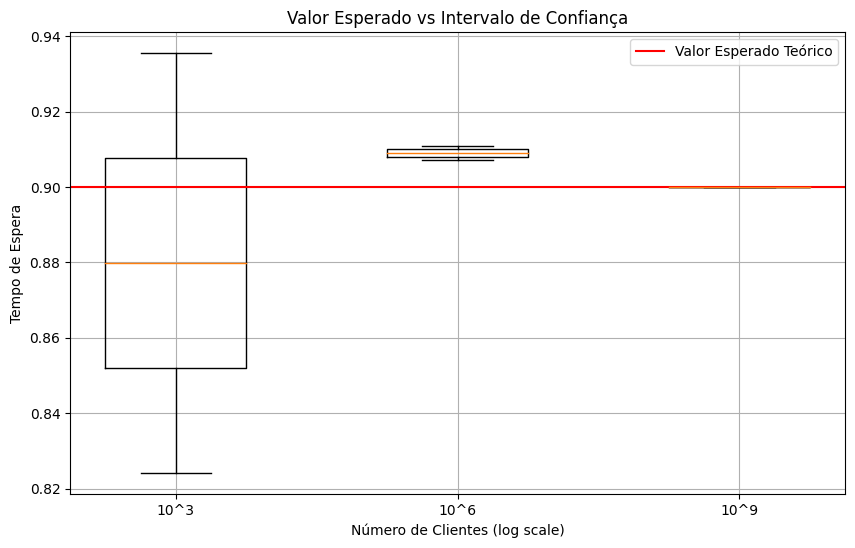

In [ ]:
def queue_expected_value(lambd, mu):
    rho = lambd / mu
    return rho / (mu * (1 - rho))


def plot_expected_vs_confidence_intervals(results, expected_value):
    plt.figure(figsize=(10, 6))

    plt.boxplot(results, positions=np.arange(len(results)) * 3, widths=1.5)

    plt.axhline(y=expected_value, color='r', linestyle='-', label='Valor Esperado Teórico')

    plt.xlabel('Número de Clientes (log scale)')
    plt.ylabel('Tempo de Espera')
    plt.xticks(np.arange(len(results)) * 3, ['10^{}'.format(3 * (i + 1)) for i in range(len(results))])
    plt.title('Valor Esperado vs Intervalo de Confiança')
    plt.legend()
    plt.grid(True)
    plt.show()


lambd = 9
mu = 10
E = queue_expected_value(lambd, mu)
results = list()

for i in range(3, 10, 3):
    n = 10 ** i
    wait_times = np.zeros(n, dtype=np.float32)

    for j in range(1, n):
        service_time = random.expovariate(mu) # Tempo de serviço de j-1
        arrival_time = random.expovariate(lambd) # Tempo de chegada de j

        curr_wait_time = wait_times[j-1] - arrival_time + service_time

        if curr_wait_time < 0:
            curr_wait_time = 0
        wait_times[j] = curr_wait_time

    mean = ADBib.arithmetic_mean(wait_times)
    ci = ADBib.confidence_interval(wait_times, mean, 0.95)

    results.append(ci)

    print(f"\nPara n = 10^{i}:")
    print(f"Tempo Médio Estimado de Espera: {mean:.6f}")
    print(f"Intervalo de Confiança de 95%: {ci}")
    print(f"Tempo Médio Teórico de Espera: {E:.6f}")

plot_expected_vs_confidence_intervals(results, E)

**Conclusão dos Resultados da Simulação da Fila M/M/1**

Por insuficiência de memória, não foi possível realizar a simulação com n = 10^12. Isso acontece pelo fato de que cada tempo de atraso é processado como float de 32bits, ou seja, 4 bytes. Logo, para armazenar os tempos de atraso de todos os clientes em um buffer, são necessários aproximadamente 4 terabytes de memória, situação inviável para os recursos computacionais disponíveis para os membros da equipe.

Através dos dados gerados, é possível concluir que quanto maior o número de clientes presentes da simulação, menor é o intervalo de confiança (para o mesmo grau de confiança de 95%) e mais próximo do valor teórico esperado a média é convergida, ou seja, de uma maneira geral, é possível afirmar que mais confiável a simulação se torna.

Contudo, também observa-se que há um trade-off a ser feito, pois quanto mais clientes presentes na simulação, mais processamento é exigido sem grandes ganhos nos resultados, pois a partir de um certo patamar (no caso deste experimento, a partir de n=10^6), a convergência da média para o valor esperado é tão pequena que não compensa o tempo de processamento e uso de recursos computacionais exigidos.

O gráfico acima ilustra visualmente a convergência dos resultados da simulação para o valor esperado teórico. Cada boxplot representa o intervalo de confiança de 95% para um determinado valor de n. A linha horizontal vermelha representa o valor esperado teórico (0.9 segundos).

À medida que n aumenta, os intervalos de confiança se tornam mais estreitos e se aproximam do valor esperado teórico. Isso confirma que a simulação está produzindo estimativas cada vez mais precisas com o aumento do número de clientes.

Para n = 10^9, o intervalo de confiança é tão estreito que quase se confunde com a linha do valor esperado teórico, indicando uma alta precisão na estimativa.

